# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [73]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from bokeh.layouts import row, column 
from bokeh.io import output_file, show
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from scipy import stats
import altair as alt
output_notebook()

Loading BokehJS ...

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('/Users/armitasafavi/Downloads/hospital_readmit/data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/armitasafavi/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


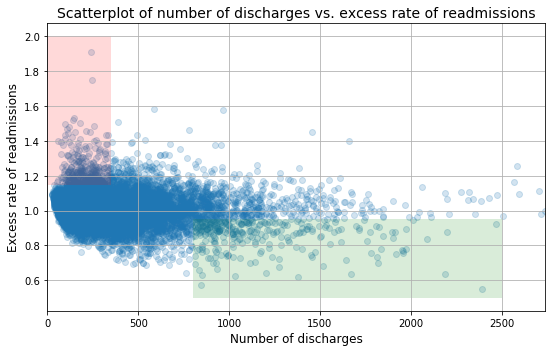

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn

In [6]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [7]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


A.Do you agree with the above analysis and recommendations? Why or why not?

In [8]:
under_100 =clean_hospital_read_df.loc[(clean_hospital_read_df['Number of Discharges']<100) & (clean_hospital_read_df['Excess Readmission Ratio']>0)]
over_1000 = clean_hospital_read_df.loc[(clean_hospital_read_df['Number of Discharges']>1000)& (clean_hospital_read_df['Excess Readmission Ratio']>0)]

In [9]:
under_100_mean = np.mean(under_100['Excess Readmission Ratio'])
under_100_mean

1.0226183501683506

In [10]:
under_100_readmission_greater_than_1= len(under_100.loc[(under_100['Excess Readmission Ratio']>1)])/len(under_100)
under_100_readmission_greater_than_1

0.6321548821548821

In [38]:
x1 = under_100['Number of Discharges']
y1 = under_100['Excess Readmission Ratio']
plot = figure(plot_width=300, plot_height=300)
par = np.polyfit(x1, y1, 1, full=True)
slope1=par[0][0]
intercept1=par[0][1]
y1_predicted = [slope1*i + intercept1  for i in x1]
plot.scatter(x1,y1, marker="square")
plot.line(x1,y1_predicted, legend= 'y='+str(round(slope1,3))+'x+'+str(round(intercept1,2)), line_color="orange")
show(plot)

In [46]:
over_1000_mean = np.mean(over_1000['Excess Readmission Ratio'])
over_1000_mean

0.9783354211663071

In [48]:
over_1000_readmission_greater_than_1 = len(over_1000.loc[(over_1000['Excess Readmission Ratio']>1)])/len(over_1000)
over_1000_readmission_greater_than_1 

0.4449244060475162

In [49]:
x2 = over_1000['Number of Discharges']
y2 = over_1000['Excess Readmission Ratio']
plot = figure(plot_width=300, plot_height=300)
par2 = np.polyfit(x2, y2, 1, full=True)
slope2=par2[0][0]
intercept2=par2[0][1]
y2_predicted = [slope2*i + intercept2  for i in x2]
plot.scatter(x2,y2, marker="square", color = 'green')
plot.line(x2,y2_predicted, legend='y='+str(round(slope2,3))+'x+'+str(round(intercept2,2)), line_color="red")
show(plot)

Statistics and conclusion for the dataset appears to be correct and there is a significant correlation between hospital capacity and readmission rates. Based on the analysis, recommendations are reasonable but it is good to keep in mind that it is not considering the effect of other features such as level of insurance and different insurance carriers.

Calculationg the slope, intercept and p-value.

In [18]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [19]:
slope, intercept, r_value, p_value, std_err 

(-2.8565052943822637e-05,
 1.017947557954422,
 -0.09309554287590444,
 1.502275642661476e-23,
 2.8498248278499884e-06)

In [21]:
print ("r-squared:", r_value**2)

r-squared: 0.008666780103359362


1.Setup an appropriate hypothesis test.

H0  β = 0
Ha  β ≠ 0

2.Compute and report the observed significance value (or p-value).

In [23]:
p_value = 1.502275642661476e-23/2

3.report statistical significance for  α  = .01

In [25]:
α  = 0.01

In [26]:
if p_value < α :
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we reject the null hypothesis


it suggests that there is a correlation between number of discharges and excess readmission ratio

4.Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Statistical significance is mathematical and sample-size centric. Practical significance arises out of applicability of the result in decision making. Practical significance is more subjective and depends upon external factors like cost, effort and time. In this example while the statistical significance implies that a probability of relationship between number of discharges and readmission ratio exists, however it is up to policy makers to decide whether this significance merits the change suggested above.
I believe that statistical significance and practical significance differ in this example. while I think the readmission ratio and number of discharges are correlated, the mean for "discharges < 100" group and "discharges >1000" group are so close that it renders the difference practically insignificant.
recommending that" Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation." is a good policy on it's own and will have good impact on overall patience care.
However I disagree with "Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges."
hospital consolidation will have negative impact on patience care as healthcare monopoly could lead to cost issues and care access issues and might negate the impact of the greater efficiency and lowering the cost of care a consolidation will bring.

5.Look at the scatterplot above.
    What are the advantages and disadvantages of using this plot to convey information?
    Construct another plot that conveys the same information in a more direct manner.
    

In [52]:
under_100 =clean_hospital_read_df.loc[(clean_hospital_read_df['Number of Discharges']<100) & (clean_hospital_read_df['Excess Readmission Ratio']>0)]
over_1000 = clean_hospital_read_df.loc[(clean_hospital_read_df['Number of Discharges']>1000)& (clean_hospital_read_df['Excess Readmission Ratio']>0)]
btwn_100_1000 = clean_hospital_read_df.loc[(clean_hospital_read_df['Number of Discharges']>100) &
                                          (clean_hospital_read_df['Number of Discharges']<1000) &
                                          (clean_hospital_read_df['Excess Readmission Ratio']>0)]

In [53]:
x1 = under_100['Number of Discharges']
y1 = under_100['Excess Readmission Ratio']
x2 = over_1000['Number of Discharges']
y2 = over_1000['Excess Readmission Ratio']
x3 = btwn_100_1000['Number of Discharges']
y3 = btwn_100_1000['Excess Readmission Ratio']

In [71]:

# plot for discharges under 100
s1 = figure(plot_width=300, plot_height=300,title='Number of discharges under 100 ')
s1.circle(x1, y1, size=5, color="navy", alpha=0.5)

# plot for discharges between 100 and 1000
s2 = figure(plot_width=300, plot_height=300, title='Number of discharges between 100 and 1000')
s2.triangle(x3, y3, size=5, color="firebrick", alpha=0.5)

# plot for discharges over 1000
s3 = figure(plot_width=300, plot_height=300, title='Number of discharges over 1000', x_range =[1000,2500])
s3.square(x2, y2, size=5, color="olive", alpha=0.5)

# put the results in a row
show(row(s1, s2, s3))



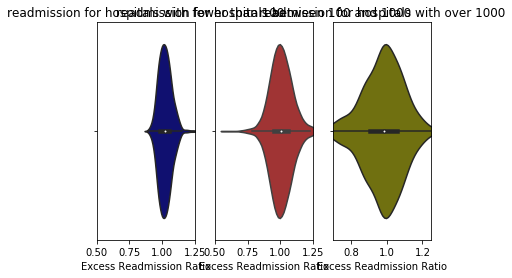

In [108]:

plt.subplot(1,3,1 )
fig.subplots_adjust(wspace=4)
fig1 = sns.violinplot(y1, color = 'navy')
plt.xlim(0.50,1.25)
plt.title('readmission for hospitals with fewer than 100')
plt.subplot(1,3,2)
fig2 =sns.violinplot(y3, color ='firebrick')
plt.xlim(0.50,1.25)
plt.title('readmission for hospitals between 100 and 1000')
fig3 =plt.subplot(1,3,3)
sns.violinplot(y2, color='olive')
plt.xlim(0.70,1.25)
plt.title('readmission for hospitals with over 1000')
plt.show()

The scatter plot is good at showing that data behaves differently in different segments and there appears to be a correlation between the number of discharges and readmission rate.
However to study the data more thoroughly, breaking down the big scatter plot into 3 different ones seems to be a better approach. The violin plots helps to show that the mean of each segment is very close to each other.